# Project of Houses Price

Name: Le Thuc Anh

Email: thucanhle149@gmail.com


    Problem statement
    
A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below. 

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

The company wants to know:

Which variables are significant in predicting the price of a house, and

How well those variables describe the price of a house.

    Machine learning process
In this project, we will try different kinds of linear regression model to find the most important variables when predicting price of the house and how well the model with these variables predict the price of a house.

The project will have 4 parts:
    
    I - Exploratory Data Analysis
    II - Data Preprocessing
    III - First model - Linear Regression
    IV - Regularization 
    V - Best model 


In [939]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE, RFECV
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, mean_squared_error, r2_score

from datetime import datetime 
from sklearn.preprocessing import MinMaxScaler

from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import GridSearchCV

In [940]:
# Setting up max columns to print and printing out non-scientific numbers 
pd.set_option("display.max_columns",100)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Import dataset

Let's import the provided dataset and see the details of it.

In [941]:
# Import dataset for perform model
dt = pd.read_csv('train.csv')
# Import another dataset for analysis of model
dt_raw = pd.read_csv('train.csv')

In [942]:
dt.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.000,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.000,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.000,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.000,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.000,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.000,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.000,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.000,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.000,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.000,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.000,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.000,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.000,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.000,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.000,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# Part I : Exploratory Data Analysis

Our dataset cotains 1460 rows and 81 columns:

In [943]:
dt.shape

(1460, 81)

The columns are:

In [944]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

We will drop column **Id** as it is not useful in the analysis.

In [945]:
dt = dt.drop('Id', axis = 1)

## 1.Columns data types

The column **GarageYrBlt** should've been an integer column. So that, we will change the type back to Int64.

In [946]:
dt['GarageYrBlt'] = dt['GarageYrBlt'].astype('Int64')

The column **OverallQual**, **OverallCond** and **MSSubClass** contain numerical values that represent categorical values. So that, we need to map those categorical to the current numerical values of these columns.

In [947]:
dt['OverallQual'] = dt['OverallQual'].replace({1: 'VeryPoor', 2: 'Poor', 3 : 'Fair', 4:'BelowAverage', 5:'Average', 6:'AboveAverage', 
                                               7: 'Good', 8:'VeryGood', 9:'Excellent', 10:'VeryExcellent'})
dt['OverallCond'] = dt['OverallCond'].replace({1: 'VeryPoor', 2: 'Poor', 3 : 'Fair', 4:'BelowAverage', 5:'Average', 6:'AboveAverage', 
                                               7: 'Good', 8:'VeryGood', 9:'Excellent', 10:'VeryExcellent'})
dt['MSSubClass'] = dt['MSSubClass'].replace({20: 'STORY1_NEWER', 30: 'STORY1_OLDER', 40: 'STORY1_ATTIC', 50: 'STORY1.5_UNFIN',
                                             60: 'STORY2_NEWER', 70:'STORY2_OLDER', 80:'SPLIT_MULLVL', 90:'DUPLEX', 
                                             120:'STORY1_PUD_NEWER', 150:'STORY1.5_PUD', 160: 'STORY2_PUD_NEWER', 180: 'PUD_MULLVL',
                                             190: 'FAM2_CONV'})

## 2.Missing values

Let's deep dive on columns contains null values:

In [948]:
tmp = dt.isnull().sum()
tmp[tmp>0]

LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [949]:
cols = dt.columns[dt.isnull().any()]
for col in cols:
    print(f'{col}: {dt[col].unique()}')

LotFrontage: [ 65.  80.  68.  60.  84.  85.  75.  nan  51.  50.  70.  91.  72.  66.
 101.  57.  44. 110.  98.  47. 108. 112.  74. 115.  61.  48.  33.  52.
 100.  24.  89.  63.  76.  81.  95.  69.  21.  32.  78. 121. 122.  40.
 105.  73.  77.  64.  94.  34.  90.  55.  88.  82.  71. 120. 107.  92.
 134.  62.  86. 141.  97.  54.  41.  79. 174.  99.  67.  83.  43. 103.
  93.  30. 129. 140.  35.  37. 118.  87. 116. 150. 111.  49.  96.  59.
  36.  56. 102.  58.  38. 109. 130.  53. 137.  45. 106. 104.  42.  39.
 144. 114. 128. 149. 313. 168. 182. 138. 160. 152. 124. 153.  46.]
Alley: [nan 'Grvl' 'Pave']
MasVnrType: ['BrkFace' nan 'Stone' 'BrkCmn']
MasVnrArea: [1.960e+02 0.000e+00 1.620e+02 3.500e+02 1.860e+02 2.400e+02 2.860e+02
 3.060e+02 2.120e+02 1.800e+02 3.800e+02 2.810e+02 6.400e+02 2.000e+02
 2.460e+02 1.320e+02 6.500e+02 1.010e+02 4.120e+02 2.720e+02 4.560e+02
 1.031e+03 1.780e+02 5.730e+02 3.440e+02 2.870e+02 1.670e+02 1.115e+03
 4.000e+01 1.040e+02 5.760e+02 4.430e+02 4.680e+02 6.60

For column *Alley*, *BsmtFinType2*, *MasVnrType*, *BsmtQual*, *BsmtCond*, *BsmtExposure*, *BsmtFinType1*, *BsmtFintype2*, *FireplaceQu*, *GarageType*, *GarageFinish*, *GarageQual*, *GarageCond*, *PoolQC*, *Fence*, *MiscFeature* we will create dummy variables later for this column so the null values is not a problem.

For **Electrical** column, there is only 1 null value and the value are not easily fill as electrical is a must for any house but type of electrical is hard to decide. Moreover, only 1 record is missing so that we could eliminate this record.

In [950]:
dt['Electrical'].unique()

array(['SBrkr', 'FuseF', 'FuseA', 'FuseP', 'Mix', nan], dtype=object)

In [951]:
dt = dt[dt['Electrical'].isnull() == False]

For column **LotFrontage**, **MasVnrArea** a null value means there are no masonry area inside the property so that we will fill null values with number 0.

In [952]:
dt['LotFrontage'] = dt['LotFrontage'].fillna(0)
dt['MasVnrArea'] = dt['MasVnrArea'].fillna(0)

In [953]:
tmp = dt.isnull().sum()
tmp[tmp>0]

Alley           1368
MasVnrType       871
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
FireplaceQu      689
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1452
Fence           1178
MiscFeature     1405
dtype: int64

We will created a list of special null columns to create dummy without dropping first column later:

In [954]:
# Filter all categorical columns in dataset
dt_cat = dt.select_dtypes(include=object)
dt_cat.columns

Index(['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive',
       'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition'],
      dtype='object')

In [955]:
# Create a list of special null categorical columns
cols_null = dt_cat.columns[dt_cat.isnull().any()]
cols_null

Index(['Alley', 'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

And the rest of columns in the dataset:

In [956]:
# Create a list of normal categorical columns
cols_notnull = dt_cat.columns[~dt_cat.isnull().any()]
cols_notnull

Index(['MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'ExterQual',
       'ExterCond', 'Foundation', 'Heating', 'HeatingQC', 'CentralAir',
       'Electrical', 'KitchenQual', 'Functional', 'PavedDrive', 'SaleType',
       'SaleCondition'],
      dtype='object')

## 3.Remove duplicates

Let's drop the duplicate records in the dataset:

In [957]:
dt.duplicated().sum()

0

There are no duplicate record in the dataset

## 4.Outliers Checking

Let's check if there is any outliers in the dataset that need to be treated:

In [958]:
dt_num = dt.select_dtypes(include=('float', 'int'))
dt_num.shape

(1459, 34)

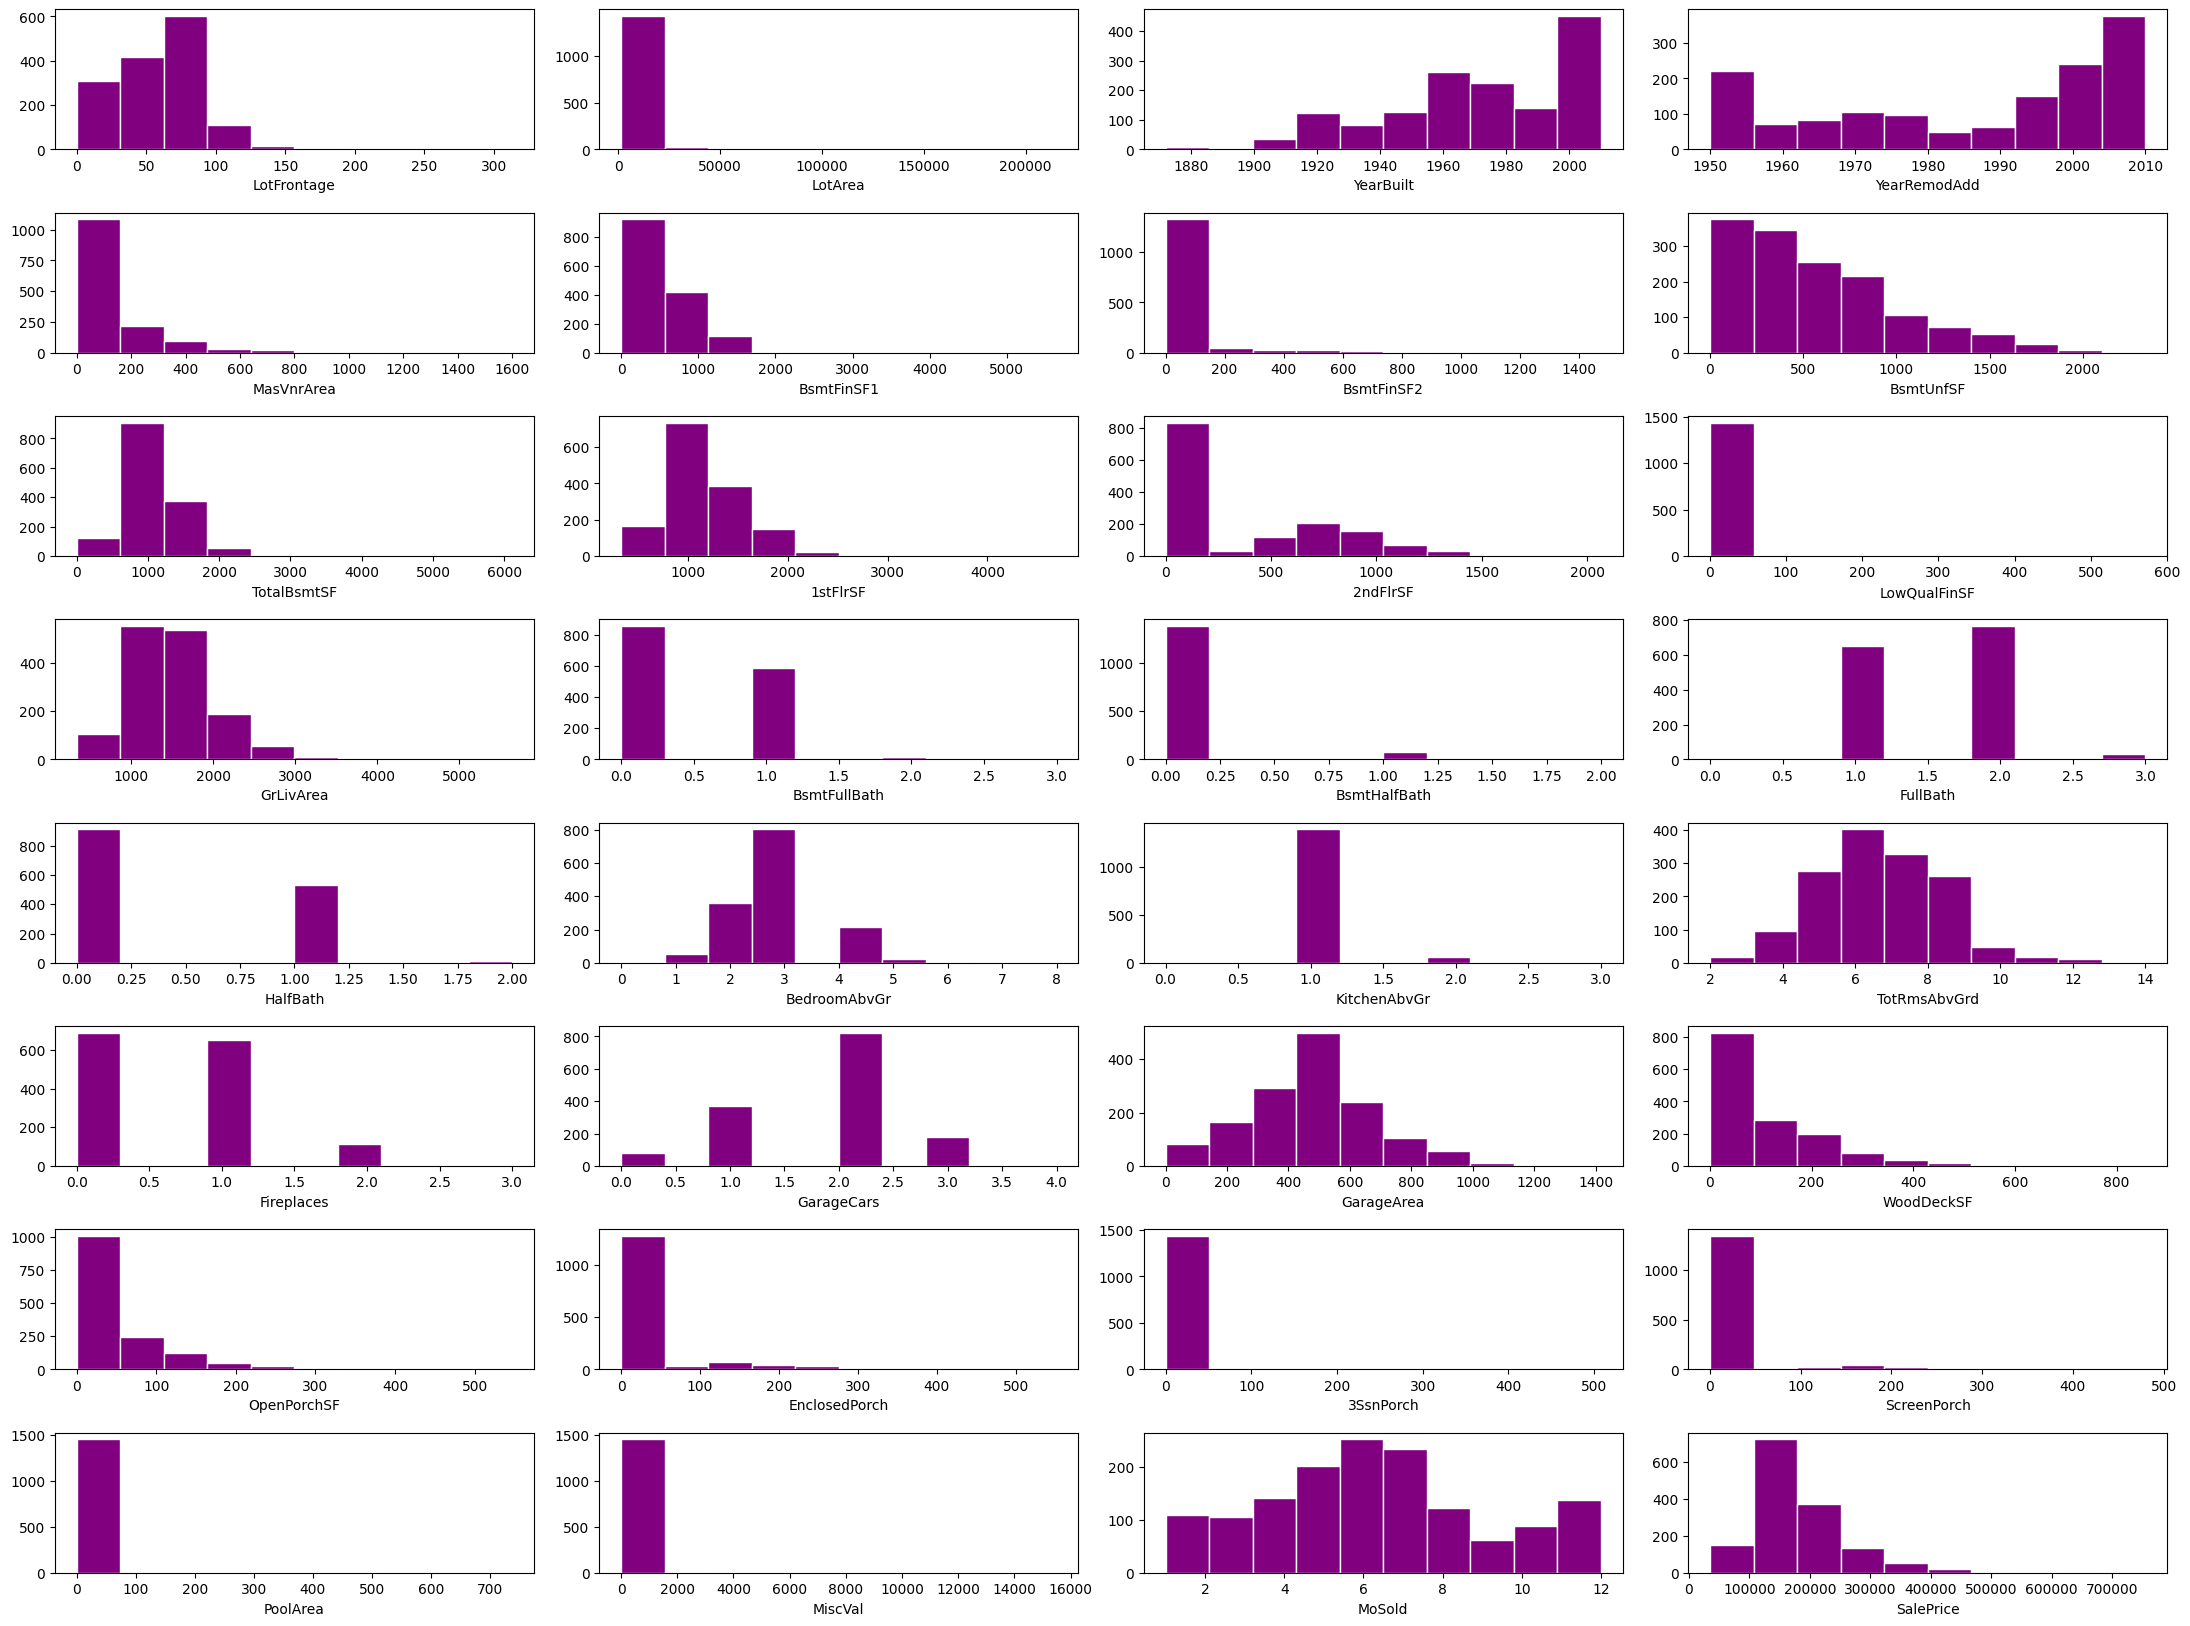

In [959]:
plt.figure(figsize = (22,20))

n = 1
dt_num = dt.select_dtypes(include=('float', 'int'))
dt_num = dt_num.drop(['GarageYrBlt', 'YrSold'], axis = 1)

for i in dt_num.columns:
    if n<=len(dt_num):
        plt.subplot(10, 4, n)
        plt.hist(x=i, data = dt, color = 'purple', edgecolor = 'white')
        # plt.boxplot(x=i, data = dt)
        plt.xlabel(i)
        plt.tight_layout()
        n+=1
    else:
        break
plt.show()

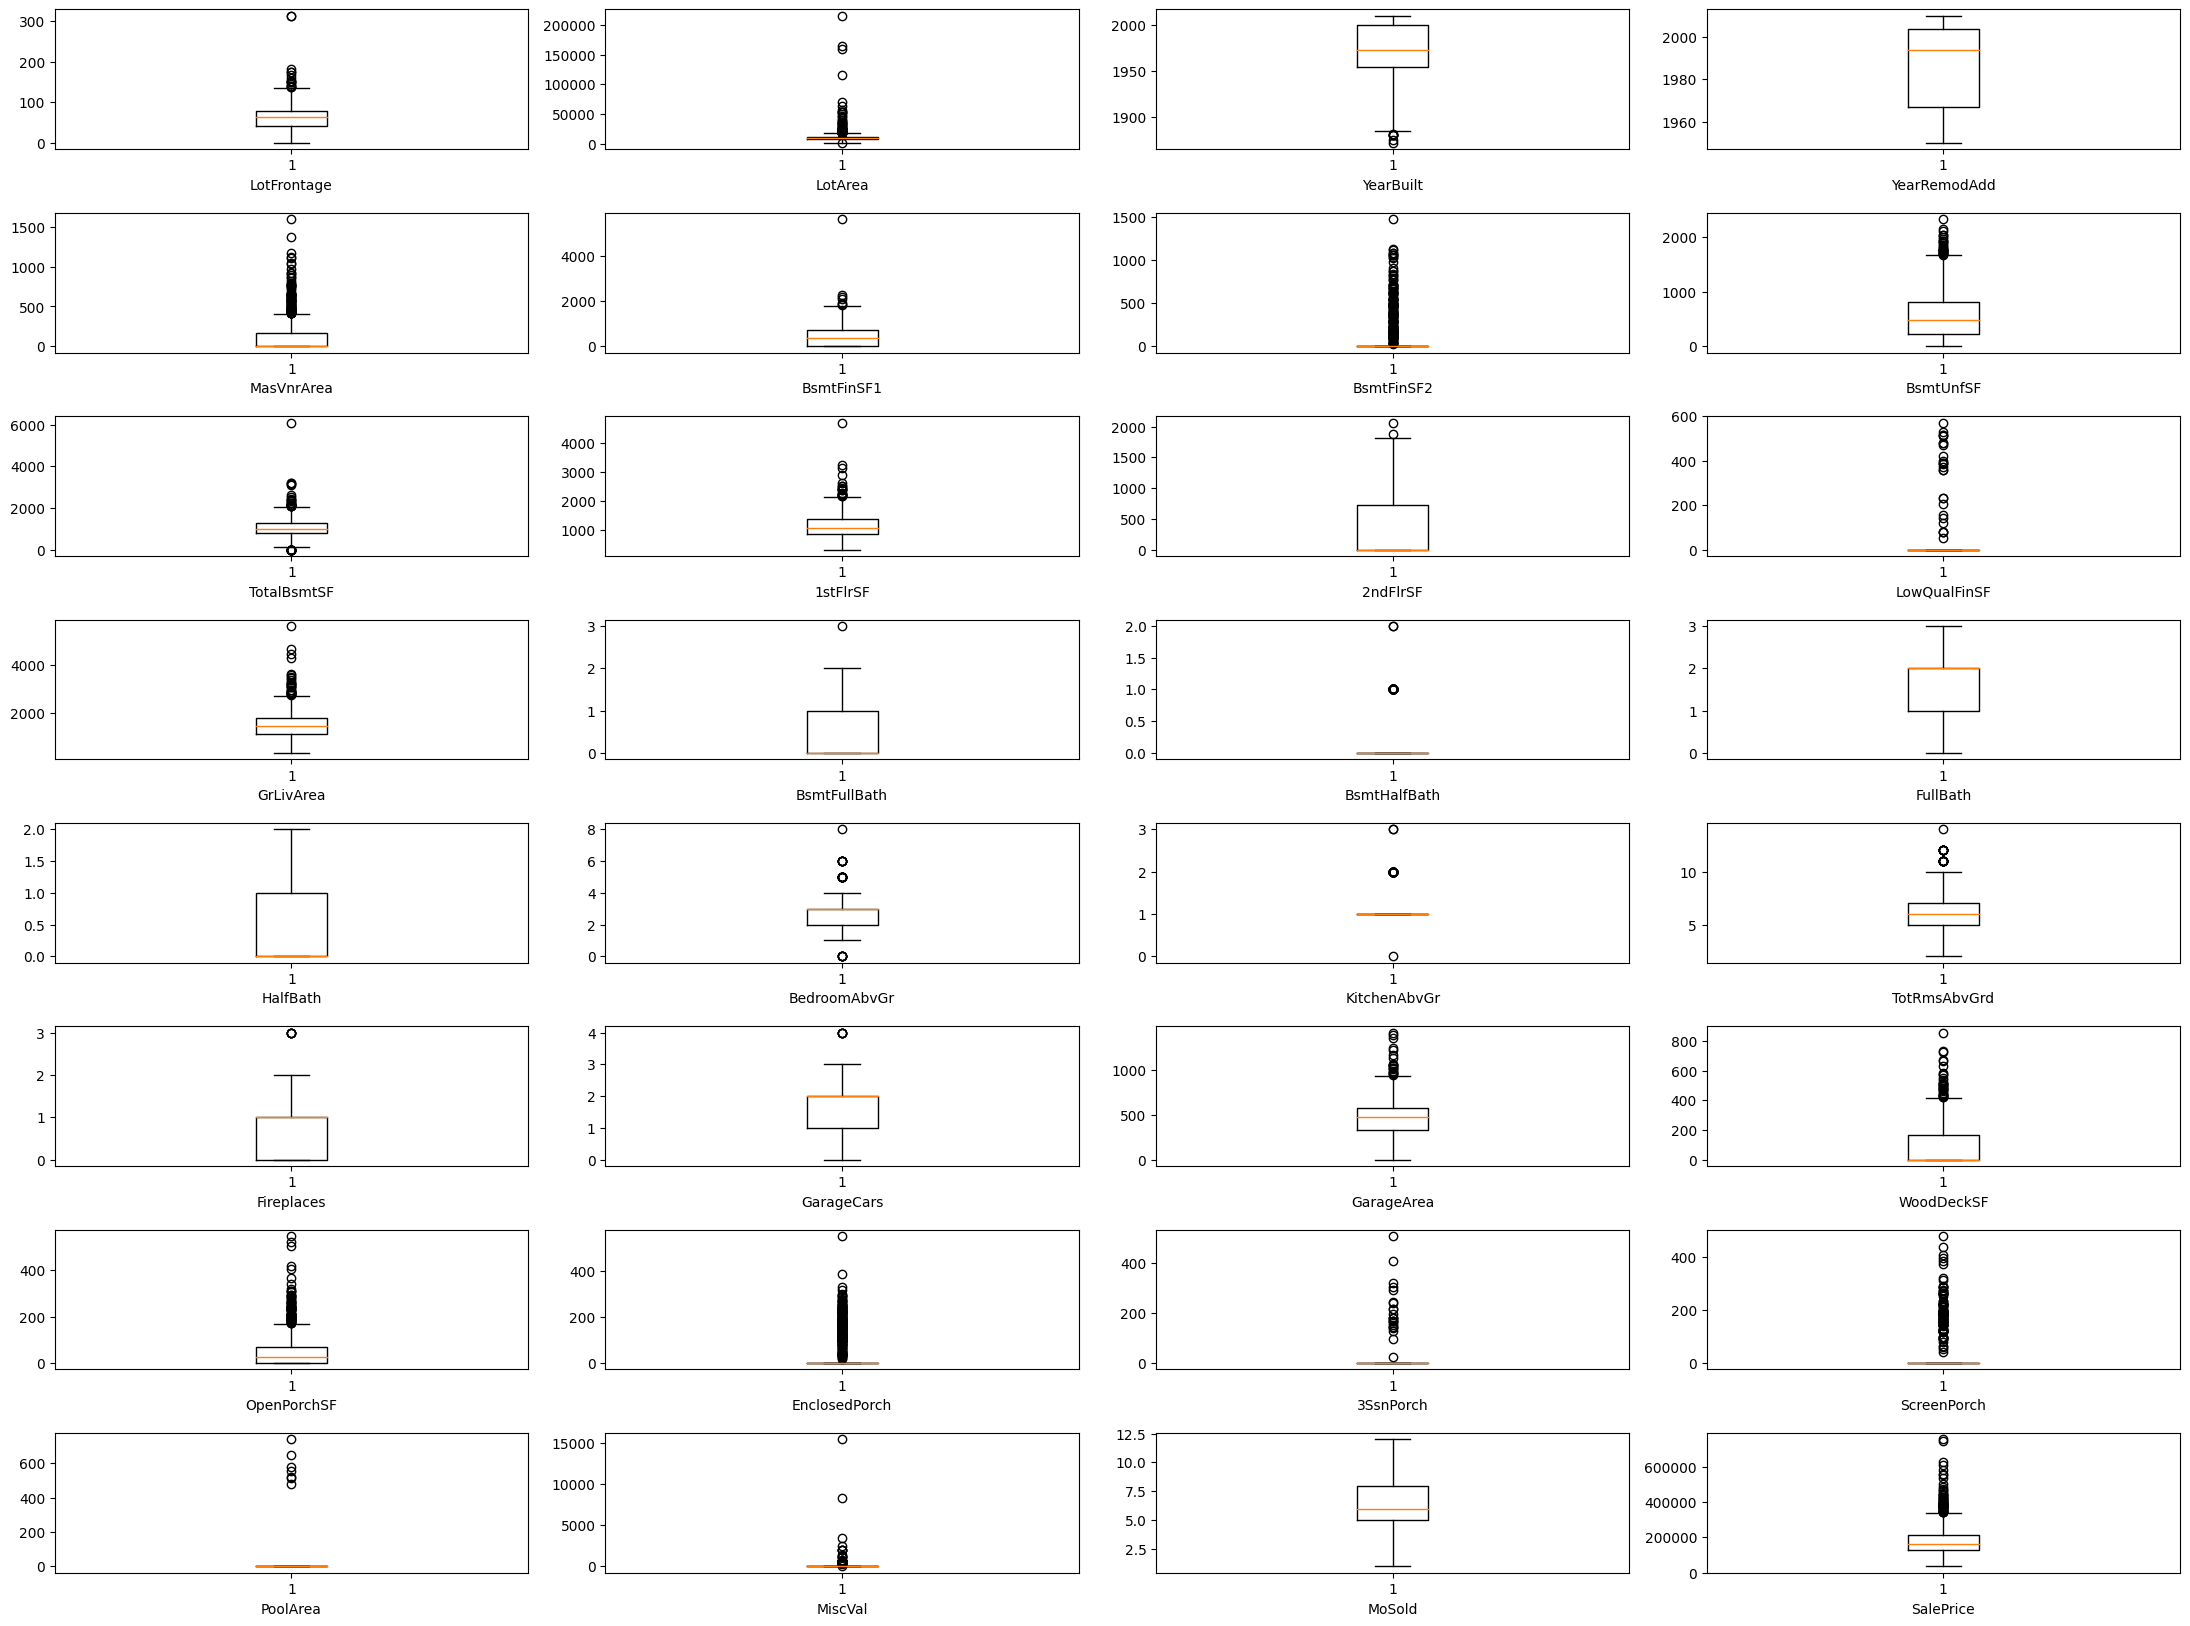

In [960]:
plt.figure(figsize = (22,20))

n = 1
# dt_num = dt.select_dtypes(include=('float', 'int'))
for i in dt_num.columns:
    if n<=len(dt_num):
        plt.subplot(10, 4, n)
        # plt.hist(x=i, data = dt, color = 'purple', edgecolor = 'white')
        plt.boxplot(x=i, data = dt)
        plt.xlabel(i)
        plt.tight_layout()
        n+=1
    else:
        break
plt.show()

The two most extreme outliers come from column *LotArea*, *PoolArea*, *MiscVal*, *BsmtFinSF2*, *BsmtHalfBath*, *LowQualFinSF*,  *KitchenAbvGr* and *EnclosedPorch*. Let's see these columns in overall trend with the label column *SalePrice*.

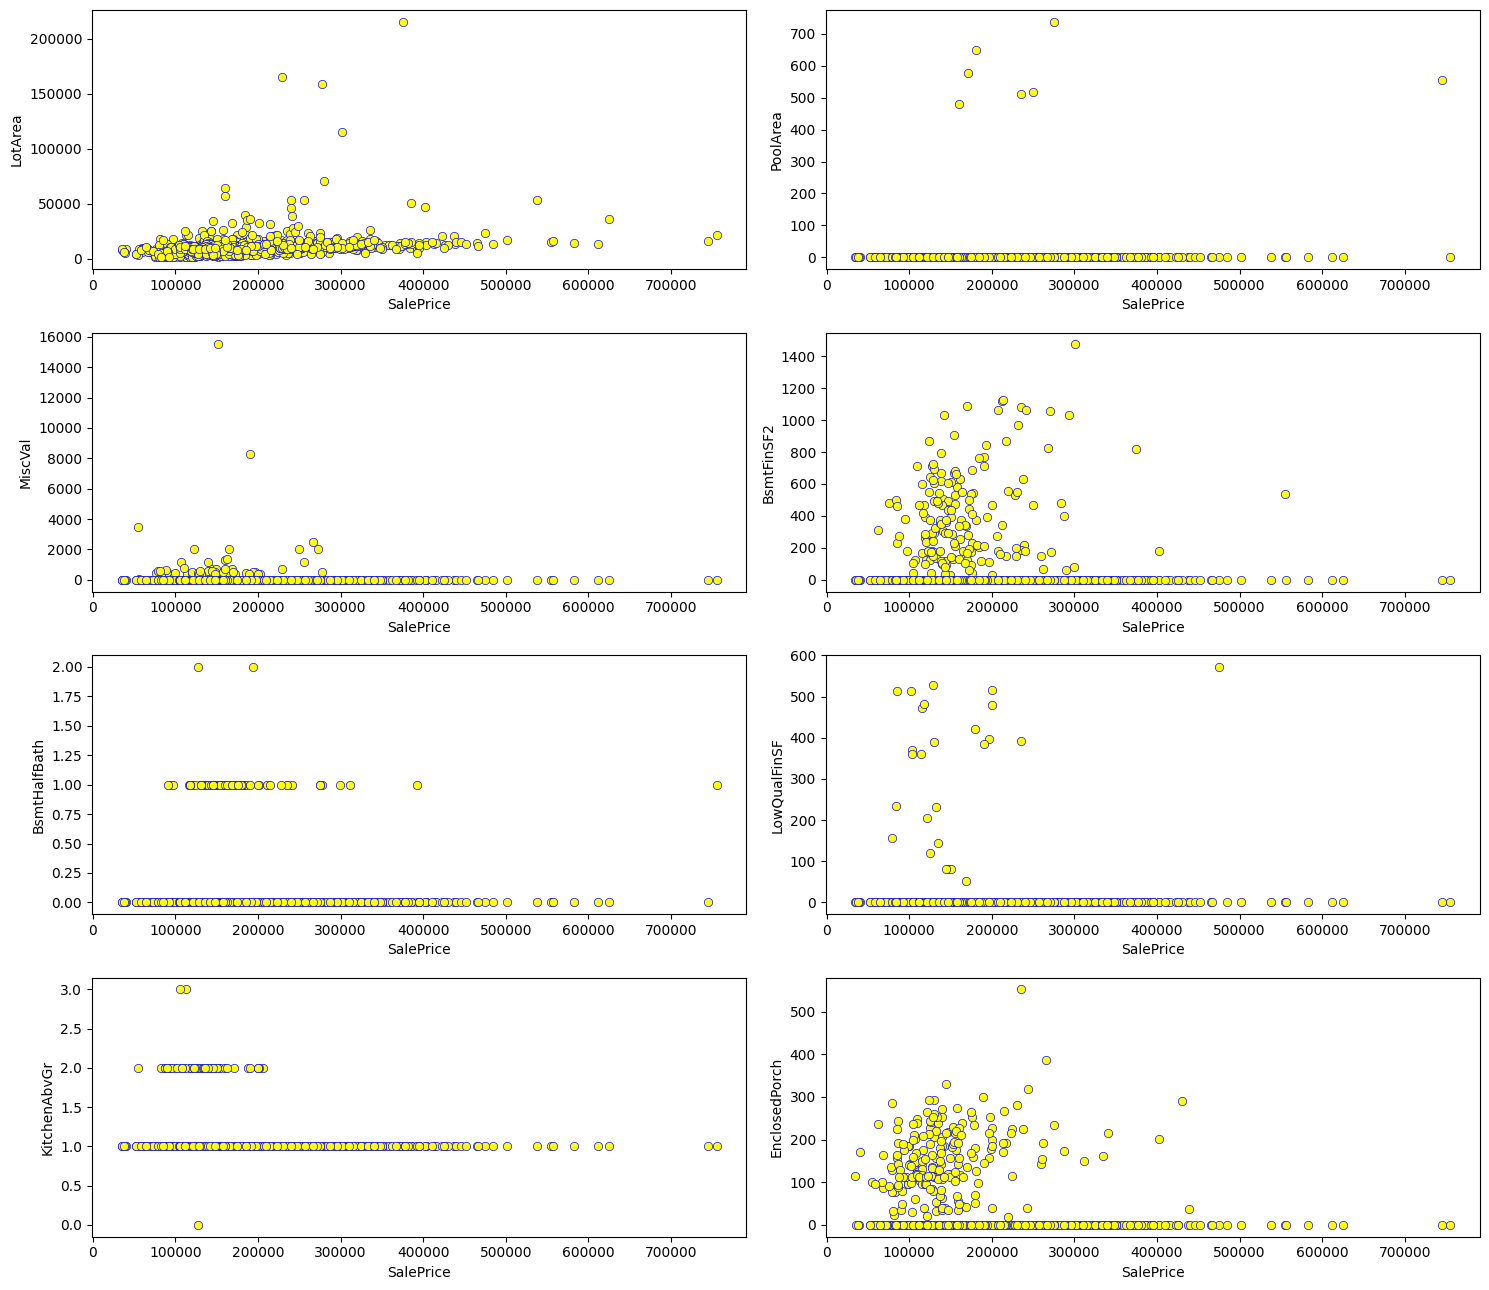

In [961]:
plt.figure(figsize = (15,13))

n = 1
columns = ['LotArea', 'PoolArea', 'MiscVal', 'BsmtFinSF2', 'BsmtHalfBath', 'LowQualFinSF', 'KitchenAbvGr', 'EnclosedPorch']
for i in columns:
    if n<=len(columns):
        plt.subplot(4, 2, n)
        sns.scatterplot(x='SalePrice', y= i, data = dt, color = 'yellow', edgecolor = 'blue')
        plt.tight_layout()
        n+=1
    else:
        break
plt.show()

We spotted some data points that is abnormal compared to the **SalePrice** of them.

So that we will remove some extreme cases from columns **LotArea** and **PoolArea**:

In [962]:
extreme_cases = dt[ (dt['LotArea'] >= 150000) | ((dt['SalePrice'] >= 700000) & (dt['LotArea'] <= 50000)) |
                   ((dt['PoolArea'] >= 400) & (dt['SalePrice'] <= 700000))].index
dt.drop(extreme_cases , inplace=True)

## 5.Create Dummy variables

In [963]:
# Create dummy variables (without dropping first column)
for i in cols_null:
    dummy = pd.get_dummies(dt[i],  dtype = 'int', prefix = i)
    dt = pd.concat([dt,dummy], axis = 1)
dt.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       ...
       'GarageCond_Gd', 'GarageCond_Po', 'GarageCond_TA', 'Fence_GdPrv',
       'Fence_GdWo', 'Fence_MnPrv', 'Fence_MnWw', 'MiscFeature_Gar2',
       'MiscFeature_Othr', 'MiscFeature_Shed'],
      dtype='object', length=140)

In [964]:
# Create dummy variables and dropping first column
for i in cols_notnull:
    dummy = pd.get_dummies(dt[i], drop_first= True, dtype = 'int', prefix = i)
    dt = pd.concat([dt, dummy], axis = 1)
dt.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=329)

Lastly, we will create dummy variables for 4 year column **GarageYrBlt**, **YrSold**, **YearBuilt** and **YearRemodAdd**:

In [965]:
# Create dummy variables and dropping first column
for i in ['GarageYrBlt', 'YrSold', 'YearBuilt', 'YearRemodAdd']:
    dummy = pd.get_dummies(dt[i], drop_first= True, dtype = 'int', prefix = i)
    dt = pd.concat([dt, dummy], axis = 1)
dt.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       ...
       'YearRemodAdd_2001', 'YearRemodAdd_2002', 'YearRemodAdd_2003',
       'YearRemodAdd_2004', 'YearRemodAdd_2005', 'YearRemodAdd_2006',
       'YearRemodAdd_2007', 'YearRemodAdd_2008', 'YearRemodAdd_2009',
       'YearRemodAdd_2010'],
      dtype='object', length=600)

In [966]:
# Drop the original columns
dt = dt.drop(cols_notnull, axis = 1)
dt = dt.drop(cols_null, axis = 1)
dt = dt.drop(['GarageYrBlt', 'YrSold', 'YearBuilt', 'YearRemodAdd'], axis = 1)

In [967]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1448 entries, 0 to 1459
Columns: 550 entries, LotFrontage to YearRemodAdd_2010
dtypes: float64(2), int64(548)
memory usage: 6.1 MB


## 6.Correlation Test

Let's check if there is any correlation between the variables and remove the variables that correlated with other variables more than 0.8.

In [968]:
# Create correlation matrix
dt_corr = dt.drop('SalePrice', axis = 1)
corr_matrix = dt_corr.corr().abs()

# Select only upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find features with correlation greater than 0.8
to_drop = [column for column in upper.columns if any(upper[column] > 0.8)] 

# Drop features 
dt.drop(to_drop, axis=1, inplace=True)


After checking correlation, we have the dataset of 1448 rows and 475 columns

In [969]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1448 entries, 0 to 1459
Columns: 475 entries, LotFrontage to YearRemodAdd_2010
dtypes: float64(2), int64(473)
memory usage: 5.3 MB


# Part II: Data Preprocesing

## 1.Split Train test Test

In [970]:
# Split dependent and independent variables
y = dt['SalePrice']
X = dt.drop('SalePrice', axis = 1)

We will split the original dataset to 2 parts: Train (70%) and Test (30%). The train dataset is used to train the model and the test dataset is to test the best performing model.

In [971]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state = 1)

## 2.Scaling features

The scaling method of MinMaxScaler is used to scaling all numerical variables in the dataset to prepare input for the upcoming model.

In [972]:
# Scaling columns
scaler = MinMaxScaler()
# Specify column to scale
num_vars = X_train.select_dtypes(include=('float', 'int')).columns
# Train the scaler on train set and transform the train dataset
X_train[num_vars] = scaler.fit_transform(X_train[num_vars])

All numeric column in dataset is having a max value of 1.

In [973]:
sum(X_train[num_vars].max() >1)

0

# Part III: Firstmodel - Linear Regression

## 1.First model


    Training first Linear Regression model
We will training the first Linear Regression model:

In [974]:
# Create model
linreg = sm.OLS(y_train, X_train)
# fit the model
linreg_model = linreg.fit()

In [975]:
linreg_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              SalePrice   R-squared (uncentered):                   0.994
Model:                            OLS   Adj. R-squared (uncentered):              0.990
Method:                 Least Squares   F-statistic:                              218.0
Date:                Wed, 26 Jul 2023   Prob (F-statistic):                        0.00
Time:                        22:49:06   Log-Likelihood:                         -11162.
No. Observations:                1013   AIC:                                  2.324e+04
Df Residuals:                     556   BIC:                                  2.549e+04
Df Model:                         457                                                  
Covariance Type:            nonrobust                                                  
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
LotFrontage                  7207.7549   9340.798      0.772      0.441   -1.11e+04    2.56e+04
LotArea                      1.445e+05   2.48e+04      5.834      0.000    9.59e+04    1.93e+05
MasVnrArea                   2.006e+04   1.15e+04      1.745      0.081   -2516.483    4.26e+04
BsmtFinSF1                   6.075e+04   8993.996      6.754      0.000    4.31e+04    7.84e+04
BsmtFinSF2                    2.32e+04   1.31e+04      1.778      0.076   -2436.802    4.88e+04
BsmtUnfSF                    1.853e+04   8082.930      2.292      0.022    2650.305    3.44e+04
TotalBsmtSF                  6.593e+04   1.15e+04      5.708      0.000    4.32e+04    8.86e+04
2ndFlrSF                     1.502e+04   1.63e+04      0.921      0.358    -1.7e+04    4.71e+04
LowQualFinSF                  176.8704   1.91e+04      0.009      0.993   -3.74e+04    3.77e+04
GrLivArea                    2.452e+05   3.03e+04      8.086      0.000    1.86e+05    3.05e+05
BsmtFullBath                  1.14e+04   7889.772      1.444      0.149   -4101.837    2.69e+04
BsmtHalfBath                -1894.7150   8034.048     -0.236      0.814   -1.77e+04    1.39e+04
FullBath                     8224.1950   9566.073      0.860      0.390   -1.06e+04     2.7e+04
HalfBath                     4108.6665   5661.005      0.726      0.468   -7010.904    1.52e+04
BedroomAbvGr                -3.209e+04   1.14e+04     -2.819      0.005   -5.45e+04   -9728.211
KitchenAbvGr                -1.268e+05   4.25e+04     -2.986      0.003    -2.1e+05   -4.34e+04
Fireplaces                   1.383e+04   9924.472      1.394      0.164   -5662.165    3.33e+04
GarageCars                   3.355e+04   9061.247      3.703      0.000    1.58e+04    5.14e+04
WoodDeckSF                   5909.6897   5591.019      1.057      0.291   -5072.412    1.69e+04
OpenPorchSF                  1722.7582   8487.536      0.203      0.839   -1.49e+04    1.84e+04
EnclosedPorch                1.011e+04   6283.687      1.608      0.108   -2235.855    2.24e+04
3SsnPorch                     917.2715   1.31e+04      0.070      0.944   -2.49e+04    2.67e+04
ScreenPorch                  2.189e+04   7710.145      2.839      0.005    6746.898     3.7e+04
PoolArea                     -7.27e-11   7.01e-10     -0.104      0.917   -1.45e-09     1.3e-09
MiscVal                      4644.4976   2.48e+04      0.187      0.852   -4.41e+04    5.34e+04
MoSold                      -1263.5844   3565.812     -0.354      0.723   -8267.694    5740.525
Alley_Grvl                  -7757.8886   8211.386     -0.945      0.345   -2.39e+04    8371.242
Alley_Pave                  -1.085e+04   6664.370     -1.627      0.104   -2.39e+04    2245.142
MasVnrTy


    First model summary
The p-value are really high (some are more than 0.9), the reason could be that we are having too many variables so that we will perform some techniques to find the most meaningful variables.

## 2.First model evaluation


    Predict the train dataset:
Let's predict the train dataset

In [976]:
y_train_pred = linreg_model.predict(X_train)


    Residual Analysis
Let's do a residual analysis:

In [977]:
from sklearn.metrics import r2_score
r2_train_lr = r2_score(y_train, y_train_pred)
r2_train_lr

0.963248109296922


    R squared of first model
The R squared for train dataset is high, more than 0.95. 


    Residual Analysis

Text(0.5, 9.444444444444438, 'residuals')

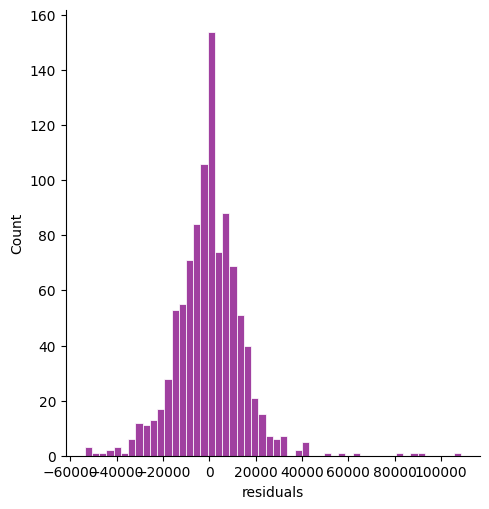

In [978]:
residuals = y_train - y_train_pred
sns.displot(residuals, color = 'purple', edgecolor = 'white')
plt.xlabel('residuals')

There are no visible patterns or trends in the below chart, so that the error terms is independent.

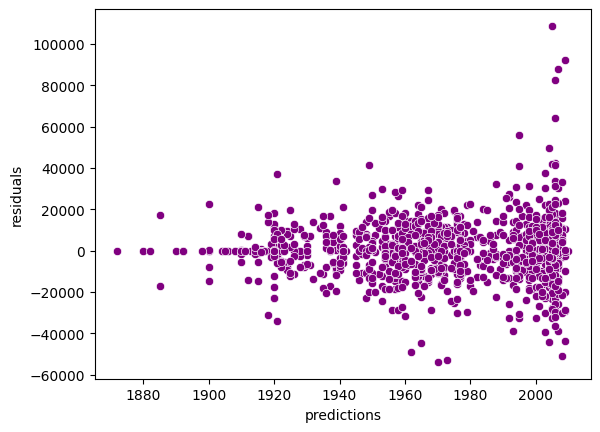

In [979]:
sns.scatterplot(x=dt_raw['YearBuilt'], y = residuals, color = 'purple', edgecolor = 'white')
plt.ylabel('residuals')
plt.xlabel('predictions')
plt.show()

When plotting the residuals through time of built, the linear regression assumptions was violated as the variance is not constant through time. So that the model is somewhat affected by time-series data.


    Model Performance
Let's see if the R squared in the test dataset is also high. First, let's predict with the test dataset:

In [980]:
# Transform the test set
X_test[num_vars] = scaler.transform(X_test[num_vars])

In [981]:
# Predict the test set
y_test_pred = linreg_model.predict(X_test)

Then, let's check the R Squared of the first model:

In [982]:
r2_test_lr = r2_score(y_test, y_test_pred)
r2_test_lr

0.7649911251053226

The R squared for test dataset is really bad, which indicated an overfitting.

Create new metrics for the model evaluation

In [983]:
rss_lr = np.sum(np.square(y_test - y_test_pred))
print("rss", rss_lr)
mse_lr = mean_squared_error(y_test, y_test_pred)
print("mse", mse_lr)
rmse_lr = mse_lr **0.5
print("rmse", rmse_lr)

rss 577904619881.2299
mse 1328516367.5430572
rmse 36448.81846566576


In [984]:
# create a list of metric for later evaluation
metric = list()

metric.append(r2_train_lr)
metric.append(r2_test_lr)
metric.append(np.sum(np.square(y_train - y_train_pred)))
metric.append(rss_lr)
metric.append(mean_squared_error(y_train, y_train_pred))
metric.append(mse_lr)
metric

[0.963248109296922,
 0.7649911251053226,
 220738908208.92154,
 577904619881.2299,
 217906128.53792846,
 1328516367.5430572]

The R squared of the first model in train dataset is high while low on test dataset, which indicate an overfitting as the R squared in the train set is really high. So that, to avoid overfitting, we will perform Regularization to have a better fitted generalised line.

## Part IV: Regularization

## 1.Ridge Regression


    Finding optimal alpha
We will use the parameter **alpha** to do regularization to the first model. The higher the value of *alpha*, the more of regularization we put into the mode. It means that if the *alpha* is too low, it will lead to overfitting and if the alpha is too high it will lead to underfitting.

In [985]:
lambdas = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10,
                     20, 50, 100, 500, 1000]}

ridge = Ridge()

#cross test
folds = 5

model_cv_ridge = GridSearchCV(estimator = ridge,
                        scoring = 'neg_mean_absolute_error',
                        param_grid = lambdas,
                        cv = folds,
                        return_train_score = True,
                        verbose = 1)

model_cv_ridge.fit(X_train, y_train)



Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 2, 3, 4, 5,
                                   6, 7, 8, 9, 10, 20, 50, 100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)


    Best alpha
After testing out all 28 values of *alpha*, we got the best *alpha* is 6.

In [986]:
print(model_cv_ridge.best_params_)

{'alpha': 6}


    Training Ridge Regression model
So next, we will fit the model with the best *alpha*

In [987]:
# Take the best alpha
alpha = model_cv_ridge.best_params_['alpha']
# Create model function
ridge = Ridge(alpha = alpha)
# Fit the model
ridge.fit(X_train, y_train)
# See the coefficients
print(ridge.coef_)


[ 5.20490672e+03  1.62850698e+04  2.05911976e+04  4.21632926e+04
  7.91019026e+03  1.90646177e+04  4.61618165e+04  2.91572008e+04
  3.45542417e+03  5.86561703e+04  1.32036946e+04 -2.96741413e+03
  2.57838229e+04  1.14647872e+04  5.09278188e+03 -1.01773890e+04
  2.13577175e+04  3.43142666e+04  1.05724707e+04  7.05618069e+03
  6.07380203e+03  4.60581270e+03  1.38931864e+04  0.00000000e+00
 -6.82849972e+02 -4.22383000e+03 -4.44235708e+02 -3.39534686e+03
 -4.38731939e+03  1.70706822e+03  2.63611091e+03  1.91503681e+04
 -1.71318496e+03 -7.81568753e+03 -8.08845089e+03 -5.45866007e+03
  2.14255232e+03 -7.85229673e+01  4.92767549e+03 -3.79183304e+02
  1.44154992e+04 -2.48474663e+03 -7.34047384e+03 -6.44545032e+01
  5.82696000e+02  6.59472204e+03 -4.02584146e+03 -5.13827905e+02
 -1.04024940e+03  7.73625027e+03 -3.02278448e+03  1.61363177e+03
  2.58076201e+03 -2.77808309e+02 -2.61150373e+03  9.91645680e+03
 -1.02804343e+03  3.46540572e+03 -2.64708563e+03  1.18950148e+03
 -5.62958729e+03  1.07520

    Predict test set
Let's see the performance of Ridge Regression model:

In [988]:
# Predict the train and test dataset
y_train_pred_ridge = ridge.predict(X_train)
y_test_pred_ridge = ridge.predict(X_test)

# R squared of those two
r2_train_ridge = r2_score(y_train, y_train_pred_ridge)
r2_test_ridge = r2_score(y_test, y_test_pred_ridge)

print('R2 train of Ridge', r2_train_ridge)
print('R2 test of Ridge', r2_test_ridge)

R2 train of Ridge 0.9292769060983421
R2 test of Ridge 0.8870122297368719



    Ridge Regression performance
We could see an improvement in performance as both of the R squared of train and test set are equally high.

In [989]:
rss_ridge = np.sum(np.square(y_test - y_test_pred_ridge))
print("rss", rss_ridge)
mse_ridge = mean_squared_error(y_test, y_test_pred_ridge)
print("mse", mse_ridge)
rmse_ridge = mse_lr **0.5
print("rmse", rmse_ridge)

rss 277845483301.021
mse 638725248.9678644
rmse 36448.81846566576


In [990]:
# create a list of metric for later evaluation
metric1 = list()

metric1.append(r2_train_ridge)
metric1.append(r2_test_ridge)
metric1.append(np.sum(np.square(y_train - y_train_pred_ridge)))
metric1.append(rss_ridge)
metric1.append(mean_squared_error(y_train, y_train_pred_ridge))
metric1.append(mse_ridge)
metric1

[0.9292769060983421,
 0.8870122297368719,
 424776473655.04114,
 277845483301.021,
 419325245.46400905,
 638725248.9678644]

## 2.Lasso Regression


    Finding optimal alpha
We will use the parameter **alpha** to do regularization to the first model. The higher the value of *alpha*, the more of regularization we put into the mode. It means that if the *alpha* is too low, it will lead to overfitting and if the alpha is too high it will lead to underfitting. 

Lasso also pushes the model coefficients towards 0 in order to handle high variance, just like Ridge regression. But, in addition to this, Lasso also pushes some coefficients to be exactly 0 and thus performs variable selection.

In [991]:
lambdas = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10,
                     20, 50, 100, 500, 1000]}

lasso = Lasso()

#cross test
folds = 5

model_cv_lasso = GridSearchCV(estimator = lasso,
                        scoring = 'neg_mean_absolute_error',
                        param_grid = lambdas,
                        cv = folds,
                        return_train_score = True,
                        verbose = 1)

model_cv_lasso.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.206e+10, tolerance: 4.676e+08
  model = cd_fast.enet_coordinate_descent(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.490e+10, tolerance: 4.653e+08
  model = cd_fast.enet_coordinate_descent(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iter

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 2, 3, 4, 5,
                                   6, 7, 8, 9, 10, 20, 50, 100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)


    Best alpha
The best *alpha* for Lasso Regression is 100.

In [992]:
print(model_cv_lasso.best_params_)

{'alpha': 100}



    Training Lasso Regression
Let's use the best alpha to train the model


In [993]:
# Take the best alpha
alpha = model_cv_lasso.best_params_['alpha']
# Create model function
lasso = Lasso(alpha = alpha)
# Fit the model
lasso.fit(X_train, y_train)
# See the coefficients
print(lasso.coef_)


[ 2.73563018e+03  1.75249027e+04  2.06193962e+04  3.22863304e+04
  0.00000000e+00 -0.00000000e+00  5.61026429e+04  4.65876398e+02
 -0.00000000e+00  2.01586113e+05  6.40017372e+03 -0.00000000e+00
  6.02077817e+03  3.26327006e+03 -8.90403306e+02 -3.61706257e+04
  1.55721553e+04  3.34296404e+04  4.11564313e+03  0.00000000e+00
  1.72796450e+02  0.00000000e+00  9.02101384e+03  0.00000000e+00
  0.00000000e+00 -3.17827689e+03 -0.00000000e+00 -0.00000000e+00
 -8.47367782e-01 -0.00000000e+00  1.21341617e+02  2.06252529e+04
  0.00000000e+00 -0.00000000e+00 -1.68792342e+03 -8.18646367e+03
 -0.00000000e+00 -0.00000000e+00  3.84201039e+02  0.00000000e+00
  1.47887378e+04 -4.28180584e+01 -4.12094624e+03  0.00000000e+00
 -0.00000000e+00  4.50856939e+03 -2.77338980e+03 -1.27962320e+03
  0.00000000e+00  4.70238934e+03 -0.00000000e+00  0.00000000e+00
  0.00000000e+00 -0.00000000e+00 -2.05366997e+03  0.00000000e+00
 -0.00000000e+00  9.67213997e+02 -0.00000000e+00  0.00000000e+00
 -0.00000000e+00  4.73446


    Predict test set
Then, we will predict the test set

In [994]:
# Predict the train and test dataset
y_train_pred_lasso = lasso.predict(X_train)
y_test_pred_lasso = lasso.predict(X_test)

# R squared of those two
r2_train_lasso = r2_score(y_train, y_train_pred_lasso)
r2_test_lasso = r2_score(y_test, y_test_pred_lasso)

print('R2 train of Lasso', r2_train_lasso)
print('R2 test of Lasso', r2_test_lasso)

R2 train of Lasso 0.934779125313199
R2 test of Lasso 0.8853939135638204



    Lasso Regression performance
Here is the performance of the Lasso Regression model

In [995]:
rss_lasso = np.sum(np.square(y_test - y_test_pred_lasso))
print("rss", rss_lasso)
mse_lasso = mean_squared_error(y_test, y_test_pred_lasso)
print("mse", mse_lasso)
rmse_lasso = mse_lr **0.5
print("rmse", rmse_lasso)

rss 281825045320.7707
mse 647873667.4040705
rmse 36448.81846566576


In [996]:
# create a list of metric for later evaluation
metric2 = list()

metric2.append(r2_train_lasso)
metric2.append(r2_test_lasso)
metric2.append(np.sum(np.square(y_train - y_train_pred_lasso)))
metric2.append(rss_lasso)
metric2.append(mean_squared_error(y_train, y_train_pred_lasso))
metric2.append(mse_lasso)
metric2

[0.934779125313199,
 0.8853939135638204,
 391729089180.97046,
 281825045320.7707,
 386701963.6534753,
 647873667.4040705]

# Part V: Best model

    All model performance
Let's create a table with all the metrics:

In [997]:
lr_table = {"Metrics" : ['R2 Score (Train)', 'R2 Score (Test)', 'RSS (Train)', 'RSS (Test)', 'MSE (Train)', 'MSE (Test)'], 
            'Linear Regression': metric}

lr_metric = pd.DataFrame(lr_table, columns = ['Metrics', 'Linear Regression'])
ridge_metric = pd.Series(metric1, name = 'Ridge Regression')
lasso_metric = pd.Series(metric2, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, ridge_metric, lasso_metric], axis = 1)

final_metric

,Metrics,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),0.963,0.929,0.935
1,R2 Score (Test),0.765,0.887,0.885
2,RSS (Train),220738908208.922,424776473655.041,391729089180.970
3,RSS (Test),577904619881.230,277845483301.021,281825045320.771
4,MSE (Train),217906128.538,419325245.464,386701963.653
5,MSE (Test),1328516367.543,638725248.968,647873667.404



    Best model summary
The best model - Ridge Regression with the alpha = 7, has a R squared of 0.887 in the test dataset. Let's deep dive into the model:

In [998]:
coef_dict = {}
for coef, feat in zip(ridge.coef_, X_train.columns):
    coef_dict[feat] = coef
coef_dict = pd.DataFrame(list(coef_dict.items()), columns=['Features', 'Coefficients'])


    Feature Importance
Top 5 most important variables are : 
- **OverallQual_Excellent**: the overall material and finish of the house is excellent will indicate a higher price of the house
- **GrLivArea**: The area of living above ground (by square fit) is bigger, the higher the price of the house
- **TotalBsmtSF**:The area of basement (by square fit) is bigger, the higher the price of the house
- **BsmtFinSF1**: The area of Type 1 basement that is finished, the larger the area the higher the price
- **GarageCars**: The more cars the garage could accommodate, the higher the price

In general, the bigger and better the house is, the higher the price as both area and quality of various parts of the house are the most important variables.


In [999]:
# Find the most important variables by coefficients
coef_dict['coef_abs'] = abs(coef_dict['Coefficients'])
coef_dict.sort_values('coef_abs', ascending = False).head(10)

,Features,Coefficients,coef_abs
9,GrLivArea,58656.170,58656.170
162,OverallQual_Excellent,47898.656,47898.656
6,TotalBsmtSF,46161.816,46161.816
3,BsmtFinSF1,42163.293,42163.293
166,OverallQual_VeryExcellent,37436.492,37436.492
17,GarageCars,34314.267,34314.267
149,Condition2_PosN,-32325.500,32325.500
135,Neighborhood_StoneBr,30055.320,30055.320
7,2ndFlrSF,29157.201,29157.201
130,Neighborhood_NridgHt,27315.750,27315.750


    Residual analysis
Let's do a residual analysis:

Text(0.5, 9.444444444444438, 'residuals')

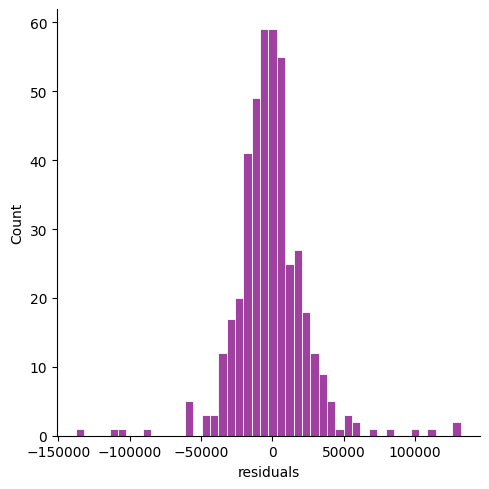

In [1000]:
residuals = y_test - y_test_pred_ridge
sns.displot(residuals, color = 'purple', edgecolor = 'white')
plt.xlabel('residuals')

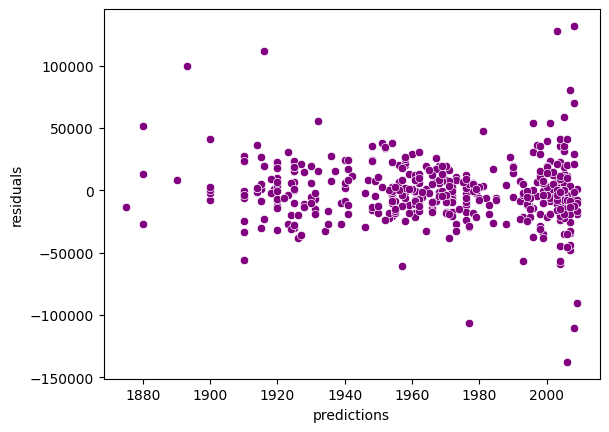

In [1001]:
sns.scatterplot(x=dt_raw['YearBuilt'], y = residuals, color = 'purple', edgecolor = 'white')
plt.ylabel('residuals')
plt.xlabel('predictions')
plt.show()


    Regression Assumptions
Both assumptions of regression are not violated as there is no visible pattern in the histogram of residuals and the variace is constant in the scatterplot of residuals and predictions.

# Part VI: Assignment Questions


    Question 1
What is the optimal value of alpha for ridge and lasso regression? What will be the changes in the model if you choose to double the value of alpha for both ridge and lasso? What will be the most important predictor variables after the change is implemented?


    Ridge Regression (doubling the alpha)
Let's first doubling the alpha value for Ridge Regression

In [1002]:
# Take the best alpha
alpha_db = model_cv_ridge.best_params_['alpha']*2
# Create model function
ridge_db = Ridge(alpha = alpha_db)
# Fit the model
ridge_db.fit(X_train, y_train)


Ridge(alpha=12)

In [1003]:
# Predict the train and test dataset
y_train_pred_ridge_db = ridge_db.predict(X_train)
y_test_pred_ridge_db = ridge_db.predict(X_test)

# R squared of those two
r2_train_ridge_db = r2_score(y_train, y_train_pred_ridge_db)
r2_test_ridge_db = r2_score(y_test, y_test_pred_ridge_db)

print('R2 train of Ridge', r2_train_ridge_db)
print('R2 test of Ridge', r2_test_ridge_db)

R2 train of Ridge 0.9155768822264251
R2 test of Ridge 0.8818812868002839


    Ridge Regression Feature Importance (doubled the alpha)
The original 5 most important variables:

In [1005]:
coef_dict = {}
for coef, feat in zip(ridge.coef_, X_train.columns):
    coef_dict[feat] = coef
coef_dict = pd.DataFrame(list(coef_dict.items()), columns=['Features', 'Coefficients'])
# Find the most important variables by coefficients
coef_dict['coef_abs'] = abs(coef_dict['Coefficients'])
coef_dict.sort_values('coef_abs', ascending = False).head(10)

,Features,Coefficients,coef_abs
9,GrLivArea,58656.170,58656.170
162,OverallQual_Excellent,47898.656,47898.656
6,TotalBsmtSF,46161.816,46161.816
3,BsmtFinSF1,42163.293,42163.293
166,OverallQual_VeryExcellent,37436.492,37436.492
17,GarageCars,34314.267,34314.267
149,Condition2_PosN,-32325.500,32325.500
135,Neighborhood_StoneBr,30055.320,30055.320
7,2ndFlrSF,29157.201,29157.201
130,Neighborhood_NridgHt,27315.750,27315.750


The new most important features:

In [1006]:
coef_dict = {}
for coef, feat in zip(ridge_db.coef_, X_train.columns):
    coef_dict[feat] = coef
coef_dict = pd.DataFrame(list(coef_dict.items()), columns=['Features', 'Coefficients'])
# Find the most important variables by coefficients
coef_dict['coef_abs'] = abs(coef_dict['Coefficients'])
coef_dict.sort_values('coef_abs', ascending = False).head(10)

,Features,Coefficients,coef_abs
9,GrLivArea,45488.046,45488.046
162,OverallQual_Excellent,41300.003,41300.003
6,TotalBsmtSF,38481.090,38481.090
3,BsmtFinSF1,34656.089,34656.089
17,GarageCars,30731.023,30731.023
166,OverallQual_VeryExcellent,28533.440,28533.440
130,Neighborhood_NridgHt,26973.813,26973.813
7,2ndFlrSF,25457.250,25457.250
12,FullBath,24998.092,24998.092
135,Neighborhood_StoneBr,24494.527,24494.527



    Lasso Regression (doubling the alpha)
Let's first doubling the alpha value for Lasso Regression


In [1007]:
# Take the best alpha
alpha = model_cv_lasso.best_params_['alpha']*2
# Create model function
lasso_db = Lasso(alpha = alpha)
# Fit the model
lasso_db.fit(X_train, y_train)

Lasso(alpha=200)

In [1008]:
# Predict the train and test dataset
y_train_pred_lasso = lasso_db.predict(X_train)
y_test_pred_lasso = lasso_db.predict(X_test)

# R squared of those two
r2_train_lasso_db = r2_score(y_train, y_train_pred_lasso)
r2_test_lasso_db = r2_score(y_test, y_test_pred_lasso)

print('R2 train of Lasso', r2_train_lasso_db)
print('R2 test of Ridge', r2_test_lasso_db)

R2 train of Lasso 0.9169212442128843
R2 test of Ridge 0.8982834350040789



    Lasso Regression Feature Importance (doubled the alpha)
The original most important features:

In [1009]:
coef_dict = {}
for coef, feat in zip(lasso.coef_, X_train.columns):
    coef_dict[feat] = coef
coef_dict = pd.DataFrame(list(coef_dict.items()), columns=['Features', 'Coefficients'])
# Find the most important variables by coefficients
coef_dict['coef_abs'] = abs(coef_dict['Coefficients'])
coef_dict.sort_values('coef_abs', ascending = False).head(10)

,Features,Coefficients,coef_abs
149,Condition2_PosN,-273247.056,273247.056
9,GrLivArea,201586.113,201586.113
166,OverallQual_VeryExcellent,93373.938,93373.938
162,OverallQual_Excellent,71954.147,71954.147
6,TotalBsmtSF,56102.643,56102.643
15,KitchenAbvGr,-36170.626,36170.626
17,GarageCars,33429.640,33429.640
3,BsmtFinSF1,32286.330,32286.330
167,OverallQual_VeryGood,31007.467,31007.467
135,Neighborhood_StoneBr,28632.050,28632.050


The new most important features:

In [1010]:
coef_dict = {}
for coef, feat in zip(lasso_db.coef_, X_train.columns):
    coef_dict[feat] = coef
coef_dict = pd.DataFrame(list(coef_dict.items()), columns=['Features', 'Coefficients'])
# Find the most important variables by coefficients
coef_dict['coef_abs'] = abs(coef_dict['Coefficients'])
coef_dict.sort_values('coef_abs', ascending = False).head(10)

,Features,Coefficients,coef_abs
9,GrLivArea,191965.865,191965.865
149,Condition2_PosN,-135358.484,135358.484
166,OverallQual_VeryExcellent,77918.224,77918.224
162,OverallQual_Excellent,70696.328,70696.328
6,TotalBsmtSF,51914.819,51914.819
17,GarageCars,36407.633,36407.633
167,OverallQual_VeryGood,32080.252,32080.252
3,BsmtFinSF1,29112.800,29112.800
249,SaleType_New,24801.859,24801.859
135,Neighborhood_StoneBr,23943.427,23943.427


The new 5 most important features are the same as before


    Question 3

After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?



In [1011]:
# Remove the 5 most important variables
X_train_new = X_train.drop(['OverallQual_Average', 'OverallQual_BelowAverage',
       'OverallQual_Excellent', 'OverallQual_Fair', 'OverallQual_Good',
       'OverallQual_Poor', 'OverallQual_VeryExcellent', 'OverallQual_VeryGood',
       'OverallQual_VeryPoor', 'GrLivArea', 'TotalBsmtSF', 'BsmtFinSF1', 'GarageCars'], axis = 1)

# Take the best alpha
alpha = 100
# Create model function
ridge_new = Ridge(alpha = alpha)

ridge_new.fit(X_train_new, y_train)


Ridge(alpha=100)

In [1012]:
X_test_new = X_test[X_train_new.columns]
# Predict the train and test dataset
y_train_pred_new = ridge_new.predict(X_train_new)
y_test_pred_new = ridge_new.predict(X_test_new)

# R squared of those two
r2_train_new = r2_score(y_train, y_train_pred_new)
r2_test_new = r2_score(y_test, y_test_pred_new)

print('R2 train of new data', r2_train_new)
print('R2 test of new data', r2_test_new)

R2 train of new data 0.7745900076831223
R2 test of new data 0.7633397266358812


Removing the 5 most important features, the model is performing worse to predict the price of the house as the R squared is lower.

In [1013]:
coef_dict = {}
for coef, feat in zip(ridge_new.coef_, X_train_new.columns):
    coef_dict[feat] = coef
coef_dict = pd.DataFrame(list(coef_dict.items()), columns=['Features', 'Coefficients'])
coef_dict

,Features,Coefficients
0,LotFrontage,5313.719
1,LotArea,4863.487
2,MasVnrArea,10821.114
3,BsmtFinSF2,2137.129
4,BsmtUnfSF,10074.578
...,...,...
456,YearRemodAdd_2005,-1268.146
457,YearRemodAdd_2006,2401.642
458,YearRemodAdd_2007,2528.653
459,YearRemodAdd_2008,3955.401


In [1014]:
# Find the most important variables by coefficients
coef_dict['coef_abs'] = abs(coef_dict['Coefficients'])
coef_dict.sort_values('coef_abs', ascending = False).head(10)

,Features,Coefficients,coef_abs
27,BsmtQual_Ex,24434.102,24434.102
126,Neighborhood_NridgHt,19496.761,19496.761
13,Fireplaces,17415.932,17415.932
9,FullBath,16332.653,16332.653
41,BsmtFinType1_GLQ,15239.502,15239.502
5,2ndFlrSF,14724.782,14724.782
53,FireplaceQu_Gd,13962.567,13962.567
164,RoofStyle_Gable,-13202.313,13202.313
36,BsmtExposure_Gd,12823.236,12823.236
125,Neighborhood_NoRidge,11849.445,11849.445


The new top 5 most important features are: **BsmtQual**, **Neighborhood**, **Fireplaces**, **FullBath**, **BsmtFinType1**


    The end